In [1]:
import numpy as np
import matplotlib.pyplot as pl
import glob
from matplotlib.colors import Normalize, LogNorm
from plot_image_collage import plot_collage

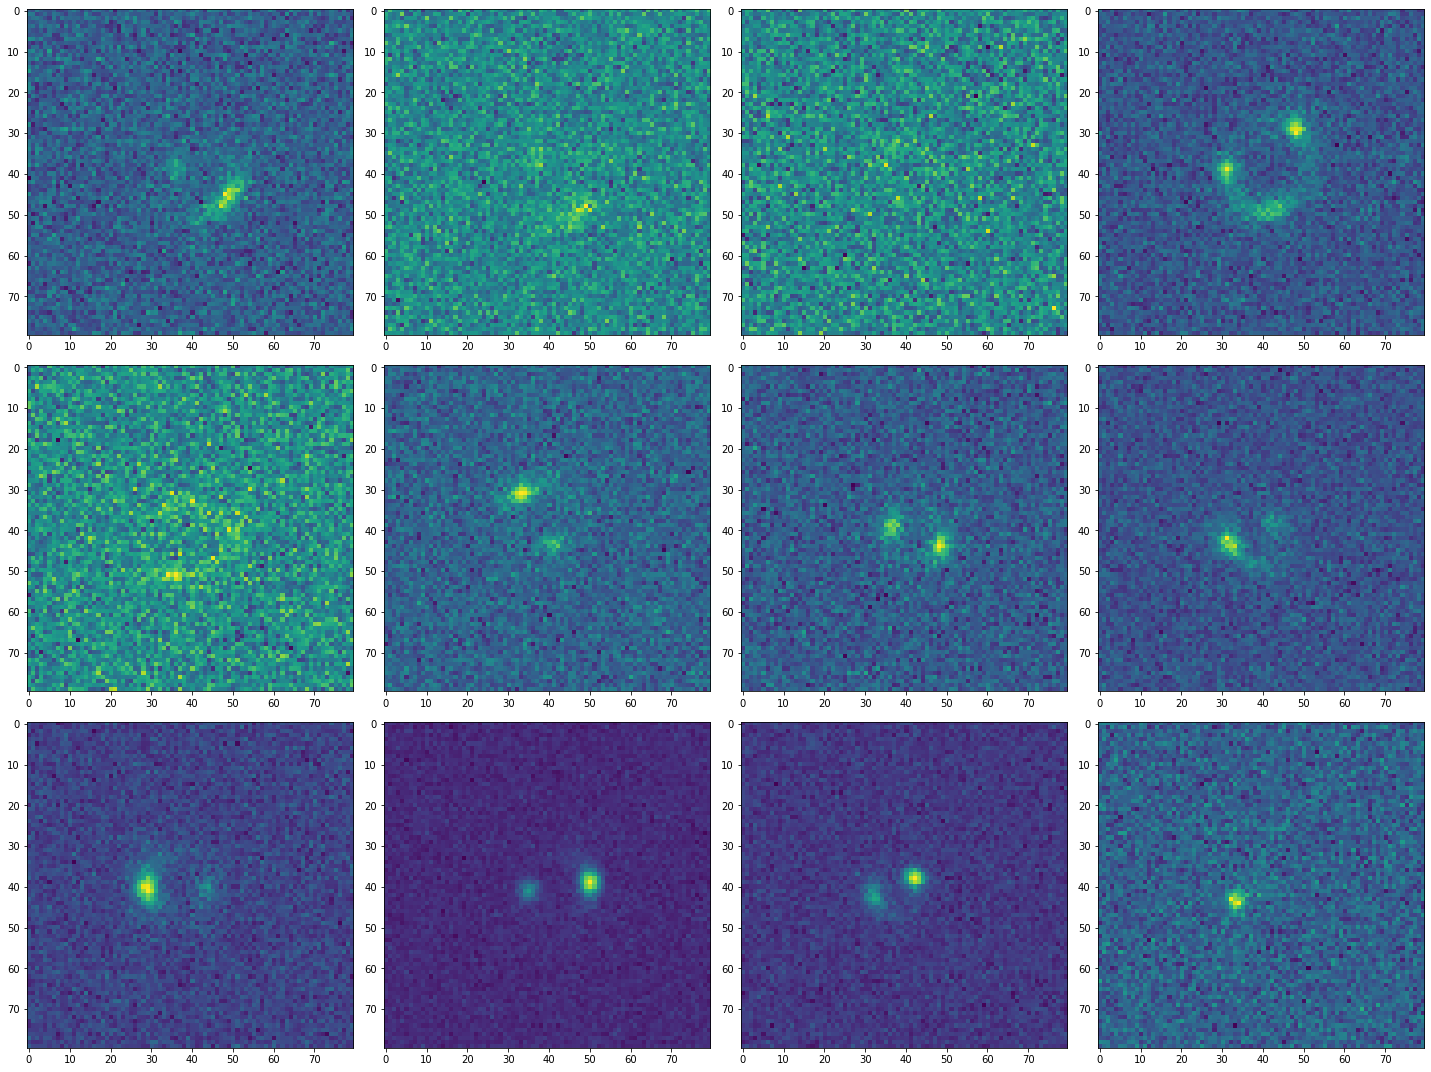

In [115]:
image_folder = '/pscratch/sd/p/phil1884/Image_Sim_Folders/training/5'

plot_collage(image_folder,3,4)


In [92]:
#From Paltas: https://github.com/swagnercarena/paltas/blob/be74107f2e285f890d61fdd91f18dd07760fe085/paltas/Sampling/distributions.py#L171
def EllipticitiesTranslation(phi,q):
	"""Class that takes in distributions for q_lens and phi_lens, returns
	samples of e1 and e2 correspondingly
	Args:
		q_dist (scipy.stats.rv_continuous.rvs or float): distribution for
			axis ratio (can be callable or constant)
		phi_dist (scipy.stats.rv_continuous.rvs or float): distribution for
			orientation angle in radians (can be callable or constant)
	Returns a sample of e1,e2
		Returns:
			(float,float): samples of x-direction ellipticity
				eccentricity, xy-direction ellipticity eccentricity
	"""
	e1 = (1 - q)/(1+q) * np.cos(2*phi)
	e2 = (1 - q)/(1+q) * np.sin(2*phi)
	return e1,e2

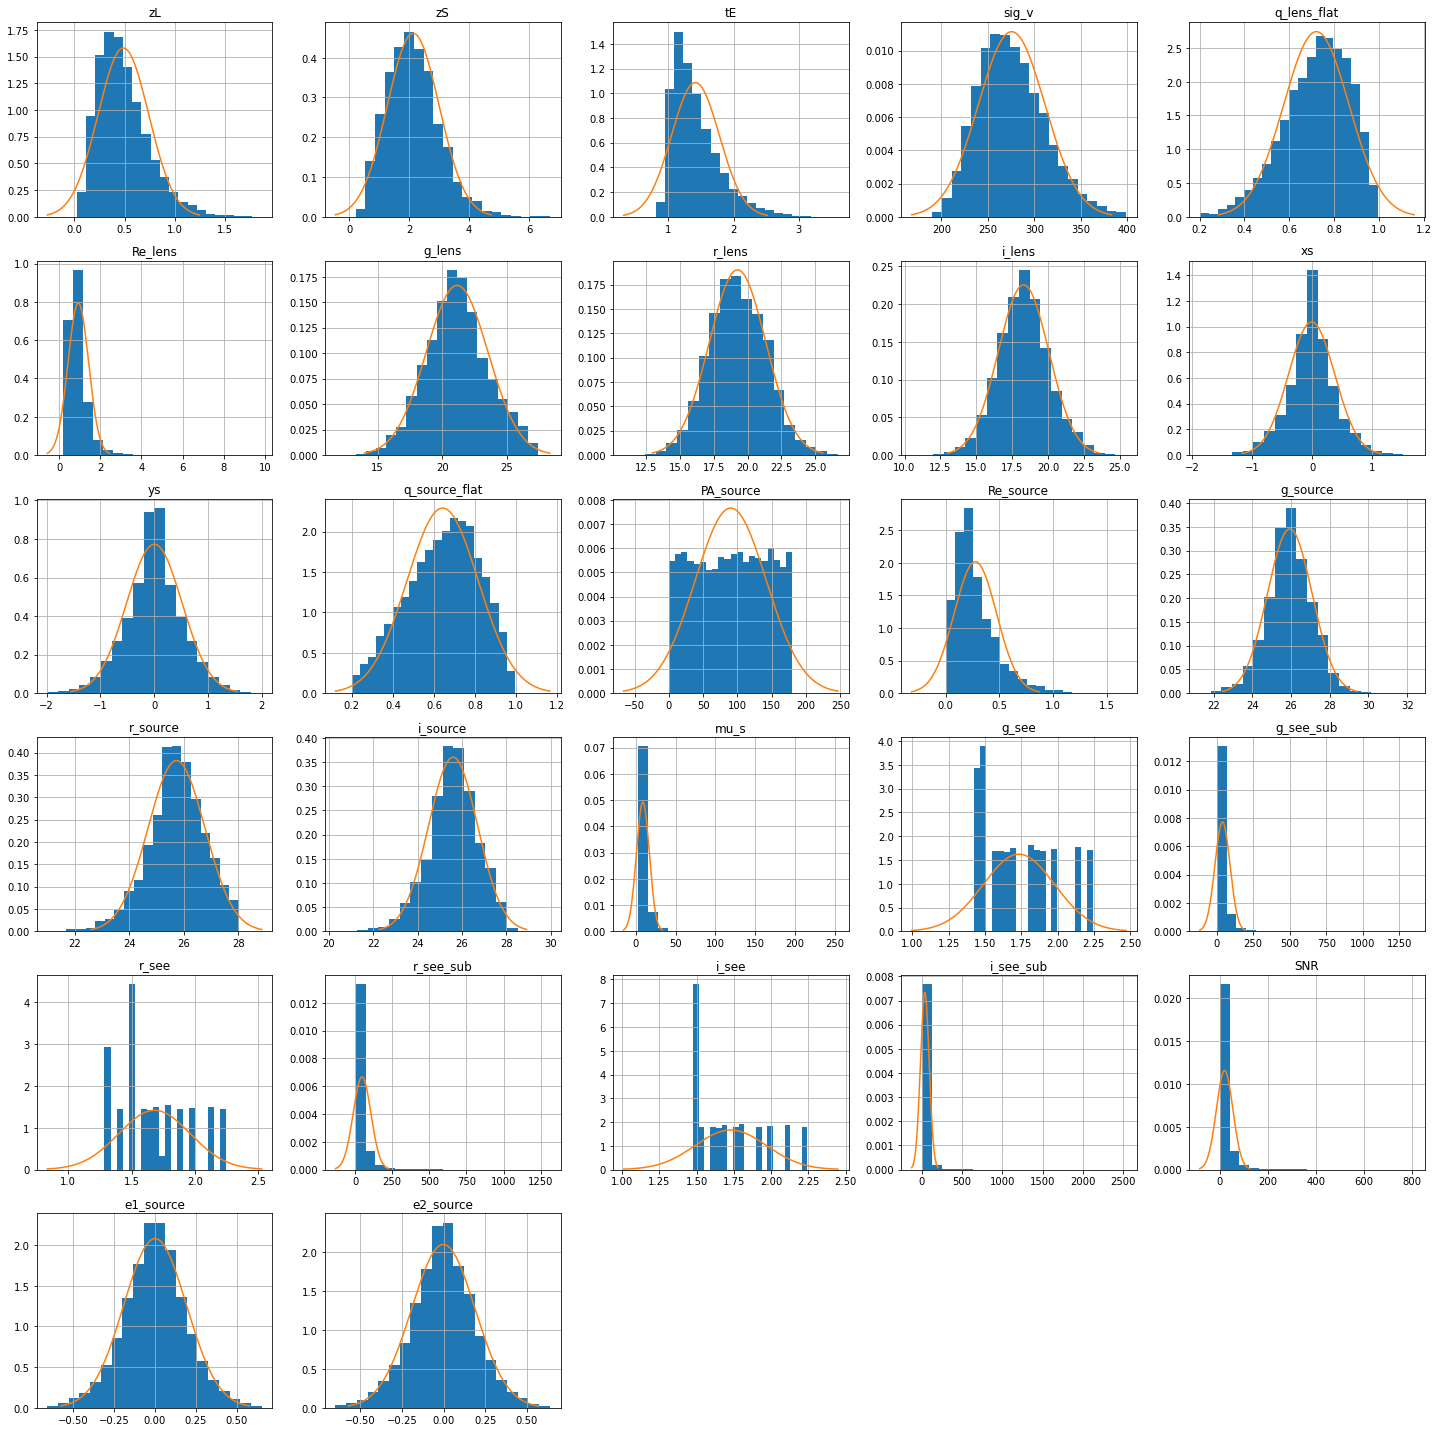

In [114]:
import pandas as pd

#[0] zl, lens redshift 
#[1] zs, source redshift 
#[2] b, Einstein radius (arcseconds) 
#[3] sig_v, lens velocity dispersion (km/s) 
#[4] ql, lens flattening (1=circular, q=1-e) 
#[5] rl, lens half light radius (arcseconds) NB/ sersic index is 4
#[6] lens g band magnitude
#[7] lens r band magnitude
#[8] lens i band magnitude
#[9] xs, source x coordinate relative, 0 is lens centre (arcseconds) 
#[10] ys, source y coordinate relative, 0 is lens centre (arcseconds) 
#[11] qs, source flattening (1=circular, q=1-e) 
#[12] ps, source position angle (degrees)
#[13] rs, source half light radius (arcseconds) NB/ sersic index is 1
#[14] source g band magnitude
#[15] source r band magnitude
#[16] source i band magnitude
#[17] mu_s, source magnification
#[18] g band coadd seeing
#[19] g band coadd signal-to-noise of source assuming poisson limited lens subtraction
#[20] r band coadd seeing
#[21] r band coadd signal-to-noise of source assuming poisson limited lens subtraction
#[22] i band coadd seeing
#[23] i band coadd signal-to-noise of source assuming poisson limited lens subtraction
#[24] signal-to-noise in the g - i difference image
from scipy.stats import norm
db_LSST = pd.read_csv('./paltas/LensPop_lenses_LSSTa.txt',skiprows=33,delimiter=' ',\
                      names = ['zL','zS','tE','sig_v','q_lens_flat', 'Re_lens', 'g_lens','r_lens','i_lens',\
                               'xs','ys','q_source_flat','PA_source','Re_source', 'g_source','r_source','i_source','mu_s',\
                               'g_see','g_see_sub','r_see','r_see_sub','i_see','i_see_sub','SNR'],index_col=False)

db_LSST_e1e2_source = EllipticitiesTranslation(db_LSST['PA_source']*(2*np.pi/360),db_LSST['q_source_flat'])
db_LSST['e1_source'] = db_LSST_e1e2_source[0]
db_LSST['e2_source'] = db_LSST_e1e2_source[1]

db_LSST_mean = np.array(db_LSST.describe().loc['mean'])
db_LSST_std = np.array(db_LSST.describe().loc['std'])
#print(db_LSST.describe())
ax = db_LSST.hist(figsize=(20,20),bins=20,density=True)
N_rows_ax,N_cols_ax = np.shape(ax)
#print(np.shape(ax))
for ii,prop_i in enumerate(list(db_LSST.columns)):
    x_ax = np.floor(ii/N_cols_ax).astype('int')
    y_ax = ii%N_cols_ax
    mean_ii = db_LSST_mean[ii]
    std_ii = db_LSST_std[ii]
    x_plot = np.linspace(mean_ii-3*std_ii,mean_ii+3*std_ii,1000)
    ax[x_ax,y_ax].plot(x_plot,norm.pdf(x=x_plot,loc=mean_ii,scale=std_ii))

pl.tight_layout()
pl.show()

In [112]:
def set_max_pd(rows=None,columns=None):
    pd.set_option('display.max_columns', columns)
    pd.set_option('display.max_rows', rows)

set_max_pd(rows=10,columns=30)

db_LSST_describe = db_LSST.describe()

db_LSST_describe.loc['sigma_to_zero'] = db_LSST_describe.loc['mean']/db_LSST_describe.loc['std']
db_LSST_describe[['tE','e1_source','e2_source','i_source','i_lens','zS','zL','xs','ys','Re_source']]

,tE,e1_source,e2_source,i_source,i_lens,zS,zL,xs,ys,Re_source
count,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000,8833.000000
mean,1.415142,0.000672,-0.002275,25.595227,18.298127,2.130606,0.487772,-0.008100,0.002240,0.275447
std,0.367205,0.191841,0.190515,1.107460,1.769459,0.865020,0.252526,0.385131,0.516112,0.197739
min,0.810000,-0.657799,-0.650611,20.290000,10.500000,0.210000,0.023000,-1.870000,-1.990000,0.000000
25%,1.140000,-0.118866,-0.117508,24.940000,17.150000,1.496000,0.302000,-0.220000,-0.290000,0.140000
50%,1.330000,0.001374,-0.002503,25.630000,18.290000,2.070000,0.445000,0.000000,0.010000,0.230000
75%,1.590000,0.119318,0.117067,26.320000,19.410000,2.660000,0.627000,0.210000,0.300000,0.360000
max,3.600000,0.651820,0.637290,29.960000,25.440000,6.689000,1.865000,1.700000,2.000000,1.680000
sigma_to_zero,3.853816,0.003502,-0.011940,23.111655,10.341084,2.463070,1.931569,-0.021033,0.004341,1.392984
